In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
#!pip install scikit-learn --upgrade

In [ ]:
#!pip install xgboost --upgrade

In [ ]:
#!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [64]:
import pandas as pd

import seaborn as sns

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier
# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold

# para meus testes
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

In [2]:
# Insira aqui o pandasDataFrame.
df_data_1 = pd.read_csv("./dataset/dados_train_iot.csv", encoding='utf8')

In [3]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,row
11890,18,42,Faria Lima,-23.5675,-46.6929,9,54552,46,77,8,NORMAL,2,2019-01-28,40,8308
11891,1,15,Faria Lima,-23.5675,-46.6929,17,51583,58,62,5,REABASTECER,16,2018-05-18,22,8058
11892,35,29,Pinheiros,-23.5664,-46.7030,12,76875,12,55,19,NORMAL,12,2018-03-04,22,8704
11893,37,33,Faria Lima,-23.5675,-46.6929,22,51379,48,22,27,REABASTECER,17,2019-12-13,0,8623
11894,27,30,Pinheiros,-23.5664,-46.7030,12,79107,53,20,8,NORMAL,43,2018-01-24,38,8664


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Açaí-Guaraná  11895 non-null  int64  
 1   Citrus        11895 non-null  int64  
 2   Estação       11895 non-null  object 
 3   LAT           11895 non-null  float64
 4   LONG          11895 non-null  float64
 5   Maçã-Verde    11895 non-null  int64  
 6   Movimentação  11895 non-null  int64  
 7   Original_269  11895 non-null  int64  
 8   Original_473  11895 non-null  int64  
 9   Pêssego       11895 non-null  int64  
 10  TARGET        11895 non-null  object 
 11  Tangerina     11895 non-null  int64  
 12  Tempo         11895 non-null  object 
 13  Zero          11895 non-null  int64  
 14  row           11895 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.4+ MB


In [5]:
df_training_dataset.nunique()

Açaí-Guaraná       42
Citrus             43
Estação            25
LAT                25
LONG               25
Maçã-Verde         43
Movimentação    10831
Original_269       65
Original_473       81
Pêssego            42
TARGET              2
Tangerina          42
Tempo             716
Zero               63
row             11895
dtype: int64

In [6]:
df_training_dataset.describe()

,Açaí-Guaraná,Citrus,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,Tangerina,Zero,row
count,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000
mean,23.814460,24.445986,-23.572908,-46.652916,24.271627,66914.699622,36.029256,46.729214,23.851955,23.918705,35.570996,8600.033207
std,12.384457,12.063265,0.026485,0.033420,12.094784,43180.095762,18.781822,25.560732,12.321735,12.327684,19.159837,4897.246928
min,1.000000,1.000000,-23.626300,-46.725200,1.000000,13592.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000
25%,13.000000,14.000000,-23.589500,-46.682300,14.000000,33224.000000,20.000000,25.000000,13.000000,13.000000,19.000000,4358.500000
50%,24.000000,25.000000,-23.566400,-46.648200,24.000000,64036.000000,36.000000,47.000000,24.000000,24.000000,36.000000,8757.000000
75%,35.000000,35.000000,-23.550000,-46.638300,35.000000,79770.000000,52.000000,68.000000,34.500000,35.000000,52.000000,12774.000000
max,43.000000,43.000000,-23.536500,-46.576500,43.000000,195294.000000,65.000000,86.000000,43.000000,43.000000,65.000000,17016.000000


<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [7]:
df_training_dataset.isna().sum()

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
row             0
dtype: int64

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [15]:
# Não precisamos pois não há valores nulos (filtrei no momento da captura dos dados)
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [ ]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_training_dataset_imputed.tail()

In [ ]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [ ]:
df_training_dataset_rmcolumns.tail()

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Criando outras colunas relevantes

In [7]:
df_data_fk1 = df_training_dataset.set_index('row').sort_values(by = ['Estação', 'Tempo'])
df_data_fk1['Data'] = pd.to_datetime(df_data_fk1['Tempo'], format='%Y-%m-%d')
df_data_fk1.head(10)

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,Data
row,,,,,,,,,,,,,,,
11521,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,NORMAL,43,2018-01-01,65,2018-01-01
11522,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,NORMAL,37,2018-01-02,55,2018-01-02
11523,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,NORMAL,31,2018-01-03,45,2018-01-03
11524,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,NORMAL,25,2018-01-04,37,2018-01-04
11525,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,NORMAL,23,2018-01-05,30,2018-01-05
11526,17,32,Ana Rosa,-23.5813,-46.6383,34,66553,36,33,18,NORMAL,18,2018-01-06,23,2018-01-06
11527,11,26,Ana Rosa,-23.5813,-46.6383,34,65138,27,25,16,NORMAL,15,2018-01-07,17,2018-01-07
11528,7,26,Ana Rosa,-23.5813,-46.6383,28,64459,18,16,13,NORMAL,9,2018-01-08,11,2018-01-08
11530,43,26,Ana Rosa,-23.5813,-46.6383,20,66543,6,86,5,NORMAL,43,2018-01-10,65,2018-01-10


In [8]:
df_data_fk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 11521 to 14400
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Açaí-Guaraná  11895 non-null  int64         
 1   Citrus        11895 non-null  int64         
 2   Estação       11895 non-null  object        
 3   LAT           11895 non-null  float64       
 4   LONG          11895 non-null  float64       
 5   Maçã-Verde    11895 non-null  int64         
 6   Movimentação  11895 non-null  int64         
 7   Original_269  11895 non-null  int64         
 8   Original_473  11895 non-null  int64         
 9   Pêssego       11895 non-null  int64         
 10  TARGET        11895 non-null  object        
 11  Tangerina     11895 non-null  int64         
 12  Tempo         11895 non-null  object        
 13  Zero          11895 non-null  int64         
 14  Data          11895 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2)

In [9]:
df_data_fk2 = df_data_fk1[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Data', 'Zero']].diff()
df_data_fk2['Dif_Dias'] = df_data_fk2['Data'].dt.days
df_data_fk2 = df_data_fk2.dropna()
df_data_fk2 = df_data_fk2.drop(df_data_fk2[df_data_fk2['Dif_Dias']<0].index)
df_data_fk2.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,Tangerina,Data,Zero,Dif_Dias
row,,,,,,,,,,
11522,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,1 days,-10.0,1.0
11523,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,1 days,-10.0,1.0
11524,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,1 days,-8.0,1.0
11525,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,1 days,-7.0,1.0
11526,-3.0,0.0,-2.0,-6.0,-12.0,-6.0,-5.0,1 days,-7.0,1.0


In [10]:
df_data_fk3 = df_data_fk2.div(df_data_fk2['Dif_Dias'], axis=0)
df_data_fk3.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,Tangerina,Data,Zero,Dif_Dias
row,,,,,,,,,,
11522,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,1 days,-10.0,1.0
11523,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,1 days,-10.0,1.0
11524,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,1 days,-8.0,1.0
11525,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,1 days,-7.0,1.0
11526,-3.0,0.0,-2.0,-6.0,-12.0,-6.0,-5.0,1 days,-7.0,1.0


In [11]:
df_data_fk4 = pd.merge(left = df_data_fk1, right = df_data_fk3[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']], suffixes = ('','_dif'), how ='left', on = 'row')
df_data_fk4.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,Zero,Data,Açaí-Guaraná_dif,Citrus_dif,Maçã-Verde_dif,Original_269_dif,Original_473_dif,Pêssego_dif,Tangerina_dif,Zero_dif
row,,,,,,,,,,,,,,,,,,,,,
11521,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,...,65,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11522,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,...,55,2018-01-02,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,-10.0
11523,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,...,45,2018-01-03,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,-10.0
11524,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,...,37,2018-01-04,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,-8.0
11525,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,...,30,2018-01-05,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,-7.0


In [12]:
cols = ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']
idx_cols = [df_data_fk4.columns.get_loc(c) for c in cols if c in df_data_fk4]

In [13]:
from scipy.stats.mstats import gmean, hmean

df_data_fk4['MIN'] = df_data_fk4[cols].min(axis=1)
df_data_fk4['MEDIA'] = df_data_fk4[cols].mean(axis=1)
with np.errstate(divide='ignore'):
    df_data_fk4['MEDIAG'] = gmean(df_data_fk4.iloc[:,idx_cols], axis=1)
    df_data_fk4['MEDIAH'] = hmean(df_data_fk4.iloc[:,idx_cols], axis=1)
df_data_fk4.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,Maçã-Verde_dif,Original_269_dif,Original_473_dif,Pêssego_dif,Tangerina_dif,Zero_dif,MIN,MEDIA,MEDIAG,MEDIAH
row,,,,,,,,,,,,,,,,,,,,,
11521,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,...,NaN,NaN,NaN,NaN,NaN,NaN,43,53.875,51.994623,50.417136
11522,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,...,-2.0,-5.0,-11.0,-6.0,-6.0,-10.0,37,48.125,46.564408,45.221000
11523,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,...,-3.0,-6.0,-7.0,-6.0,-6.0,-10.0,31,42.250,40.668250,39.304969
11524,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,...,-1.0,-9.0,-11.0,-2.0,-6.0,-8.0,25,36.250,34.952610,33.773184
11525,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,...,-1.0,-3.0,-12.0,-5.0,-2.0,-7.0,20,31.500,30.356422,29.246417


In [16]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_data_fk4.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_data_fk4)

# Reconstruindo um Pandas DataFrame com os resultados
df_data_fk5 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_data_fk4
    ),
    columns=df_data_fk4.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_data_fk5.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Açaí-Guaraná         0
Citrus               0
Estação              0
LAT                  0
LONG                 0
Maçã-Verde           0
Movimentação         0
Original_269         0
Original_473         0
Pêssego              0
TARGET               0
Tangerina            0
Tempo                0
Zero                 0
Data                 0
Açaí-Guaraná_dif    25
Citrus_dif          25
Maçã-Verde_dif      25
Original_269_dif    25
Original_473_dif    25
Pêssego_dif         25
Tangerina_dif       25
Zero_dif            25
MIN                  0
MEDIA                0
MEDIAG               0
MEDIAH               0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná        0
Citrus              0
Estação             0
LAT                 0
LONG                0
Maçã-Verde          0
Movimentação        0
Original_269        0
Original_473        0
Pêssego        

In [17]:
## Valores previstos
for c in ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473','Pêssego', 'Tangerina', 'Zero']:
    df_data_fk5[c + '_prev'] = df_data_fk5[c] + df_data_fk5[c+'_dif']
    
cols = ['Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev', 'Original_269_prev', 
                           'Original_473_prev', 'Pêssego_prev', 'Tangerina_prev', 'Zero_prev']
df_data_fk5['MIN_prev'] = df_data_fk5[cols].min(axis=1)

### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [18]:
df_data_fk5.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,MEDIAH,Açaí-Guaraná_prev,Citrus_prev,Maçã-Verde_prev,Original_269_prev,Original_473_prev,Pêssego_prev,Tangerina_prev,Zero_prev,MIN_prev
0,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,...,50.417136,43.0,43.0,43.0,65.0,86.0,43.0,43.0,65.0,43.0
1,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,...,45.221000,31.0,43.0,39.0,55.0,64.0,31.0,31.0,45.0,31.0
2,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,...,39.304969,25.0,37.0,35.0,48.0,61.0,25.0,25.0,35.0,25.0
3,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,...,33.773184,19.0,30.0,36.0,36.0,46.0,27.0,19.0,29.0,19.0
4,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,...,29.246417,15.0,29.0,35.0,39.0,33.0,19.0,21.0,23.0,15.0


In [19]:
#df_training_dataset_rmcolumns = df_data_fk5.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)
df_training_dataset_rmcolumns = df_data_fk5.drop(columns=['Tempo', 'LAT', 'LONG','Data'], inplace=False)

In [20]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training_dataset_rmcolumns['Estação_orig'] = df_training_dataset_rmcolumns['Estação']
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Estação'])
#df_training = df_training_dataset_rmcolumns
df_training.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,...,Estação_Paraíso,Estação_Pinheiros,Estação_República,Estação_São Joaquim,Estação_São Judas,Estação_Sé,Estação_Tamanduateí,Estação_Tatuapé,Estação_Trianon-Masp,Estação_Vila Mariana
11890,17,20,18,23036,48,63,27,NORMAL,7,28,...,0,0,0,0,0,0,0,0,0,1
11891,11,15,17,21894,39,56,25,NORMAL,1,18,...,0,0,0,0,0,0,0,0,0,1
11892,7,12,12,24461,31,44,23,REABASTECER,43,9,...,0,0,0,0,0,0,0,0,0,1
11893,41,43,43,22540,8,13,8,REABASTECER,30,53,...,0,0,0,0,0,0,0,0,0,1
11894,32,35,42,21844,63,86,43,NORMAL,21,38,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_training.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação', 'Original_269',
       'Original_473', 'Pêssego', 'TARGET', 'Tangerina', 'Zero',
       'Açaí-Guaraná_dif', 'Citrus_dif', 'Maçã-Verde_dif', 'Original_269_dif',
       'Original_473_dif', 'Pêssego_dif', 'Tangerina_dif', 'Zero_dif', 'MIN',
       'MEDIA', 'MEDIAG', 'MEDIAH', 'Açaí-Guaraná_prev', 'Citrus_prev',
       'Maçã-Verde_prev', 'Original_269_prev', 'Original_473_prev',
       'Pêssego_prev', 'Tangerina_prev', 'Zero_prev', 'MIN_prev',
       'Estação_orig', 'Estação_Ana Rosa', 'Estação_Barra Funda',
       'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
       'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
       'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
       'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
       'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
       'Estação_República', 'Estação_São Joaquim', 'Estação_Sã

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

### Alguns gráficos para visuzalizar

<AxesSubplot:xlabel='MIN', ylabel='MIN_prev'>

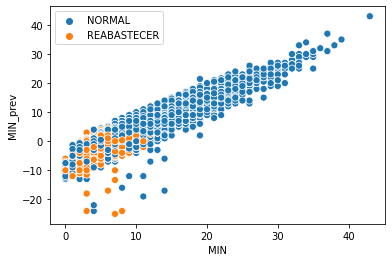

In [23]:
import matplotlib.pyplot as plt
fig = plt.plot(figsize=(28, 28))
sns.scatterplot(data = df_training, x='MIN', y='MIN_prev', hue=df_training.TARGET.tolist(), s=50)

<AxesSubplot:xlabel='MIN', ylabel='MEDIAH'>

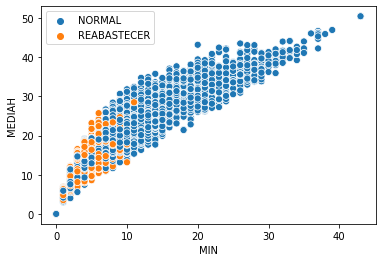

In [134]:
fig = plt.plot(figsize=(28, 28))
sns.scatterplot(data = df_training, x='MIN', y='MEDIAH', hue=df_training.TARGET.tolist(), s=50)

<AxesSubplot:xlabel='Estação_orig', ylabel='Movimentação'>

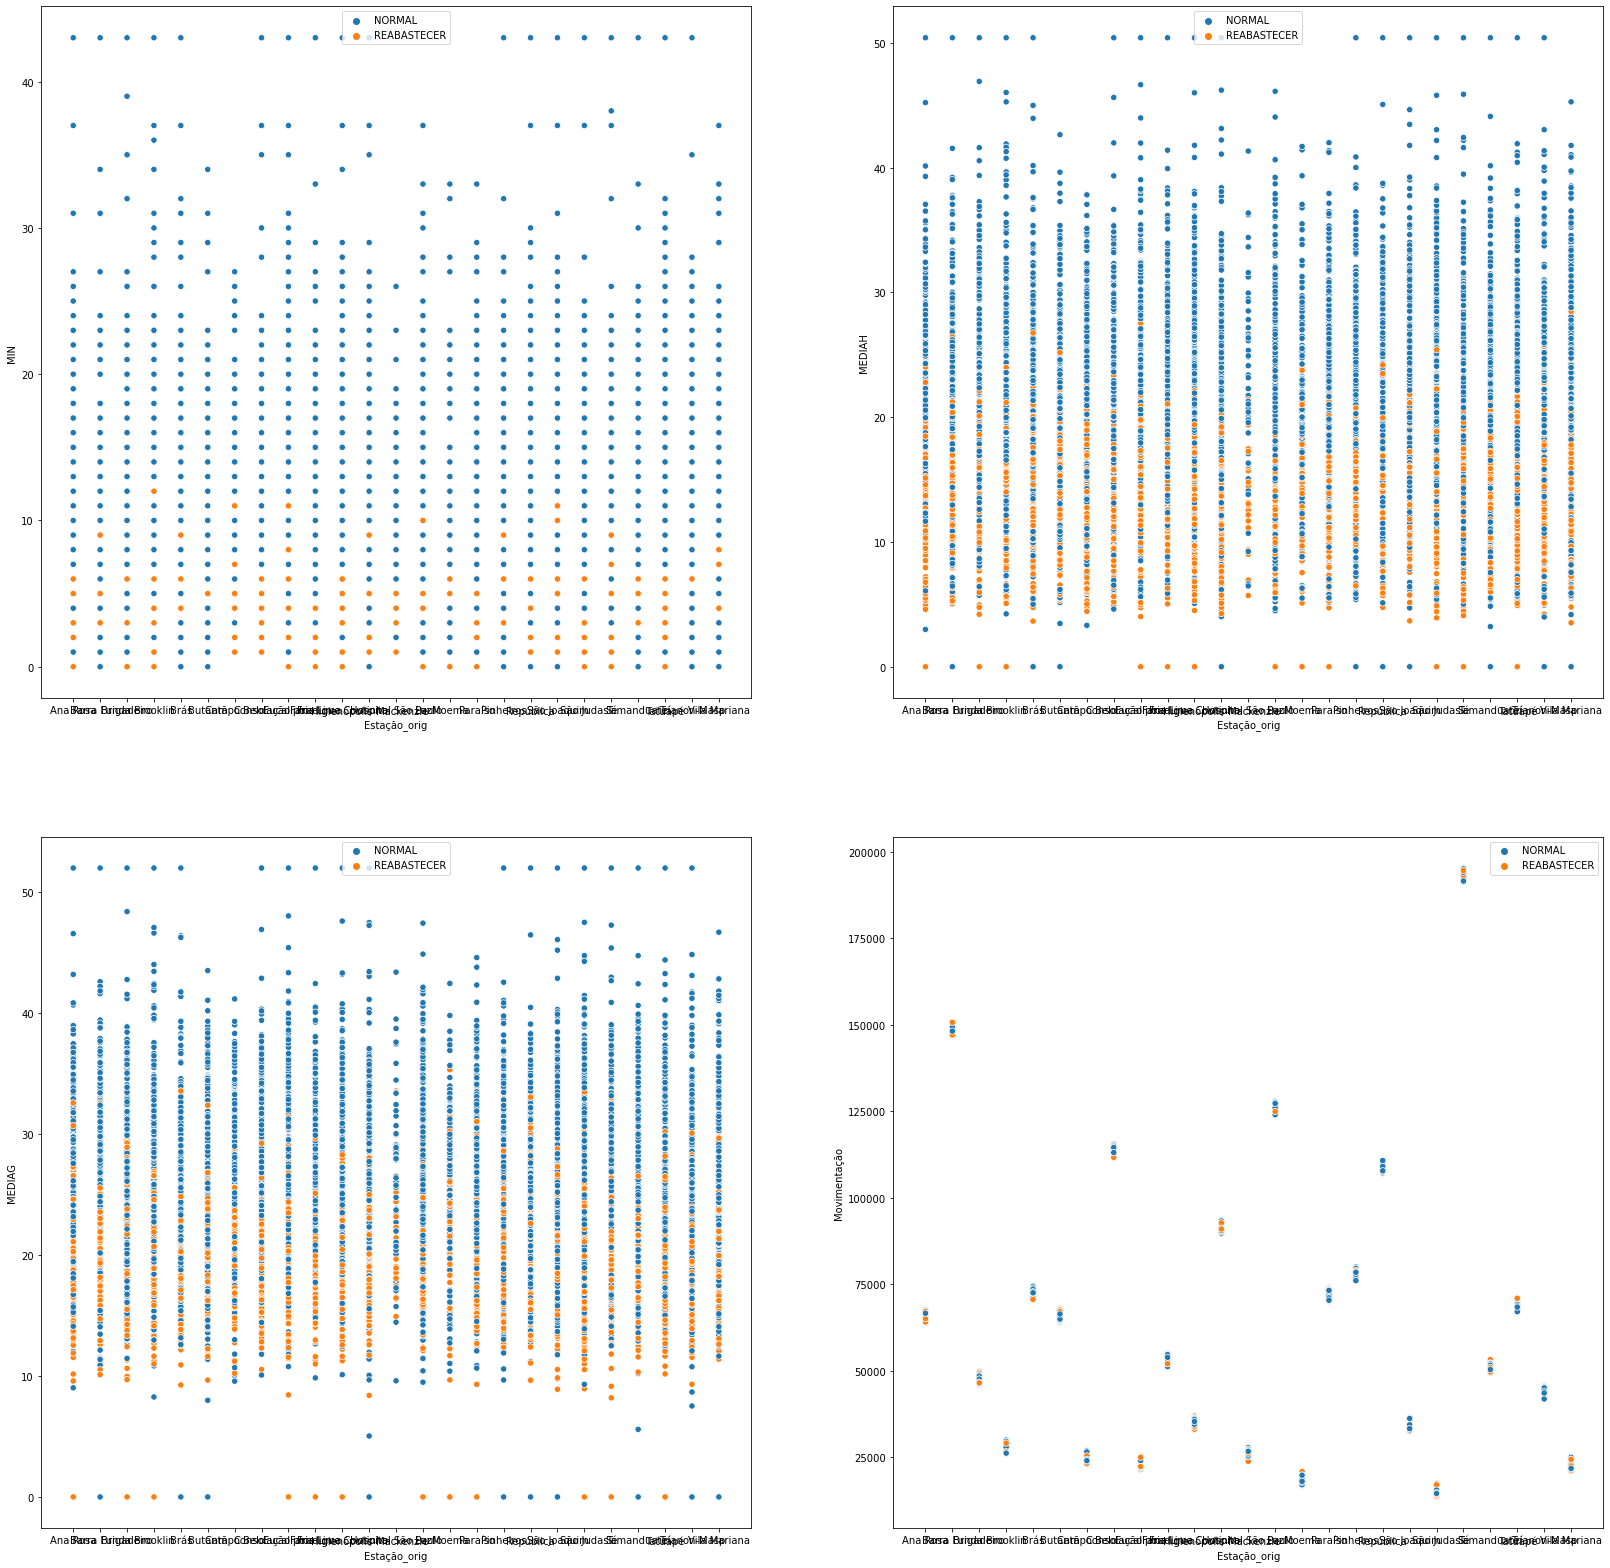

In [166]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 28))
sns.scatterplot(ax=axes[0,0], data = df_training, x='Estação_orig', y='MIN', hue=df_training.TARGET.tolist(), s=40)
sns.scatterplot(ax=axes[0,1], data = df_training, x='Estação_orig', y='MEDIAH', hue=df_training.TARGET.tolist(), s=40)
sns.scatterplot(ax=axes[1,0], data = df_training, x='Estação_orig', y='MEDIAG', hue=df_training.TARGET.tolist(), s=40)
sns.scatterplot(ax=axes[1,1], data = df_training, x='Estação_orig', y='Movimentação', hue=df_training.TARGET.tolist(), s=40)

<hr>

## Treinando um classificador com base em uma árvore de decisão

In [61]:
### funcao para imprimir resultados da validacao cruzada
def print_results(results, score="Accuracy"):
    media = results['test_score'].mean()
    dp = results['test_score'].std()
    
    print(score + ' = %.2f' % (media * 100))
    print(score + ' = [%.2f, %.2f]' % ((media - 2 * dp)*100, (media + 2 * dp)*100))

### Selecionando FEATURES e definindo a variável TARGET

In [14]:
df_training.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473',
       'Pêssego', 'TARGET', 'Tangerina', 'Zero', 'Data', 'Açaí-Guaraná_dif',
       'Citrus_dif', 'Maçã-Verde_dif', 'Original_269_dif', 'Original_473_dif',
       'Pêssego_dif', 'Tangerina_dif', 'Zero_dif'],
      dtype='object')

In [25]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        #'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif', 'Pêssego_dif'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133, stratify = target, shuffle = True)

### Treinando uma árvore de decisão

In [27]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=4, random_state=133).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [28]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'NORMAL' 'REABASTECER' ... 'REABASTECER' 'REABASTECER' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

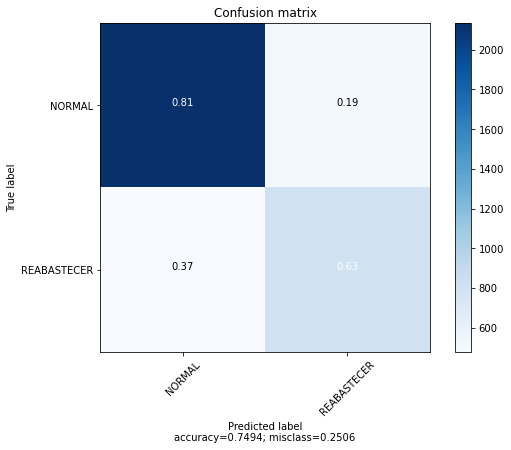

In [30]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

In [31]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

0.6209553158705701

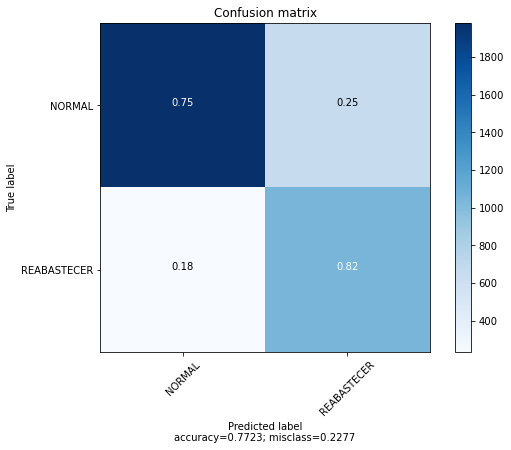

0.7014028056112224

In [257]:
model = RandomForestClassifier(random_state = 133, max_depth=14).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

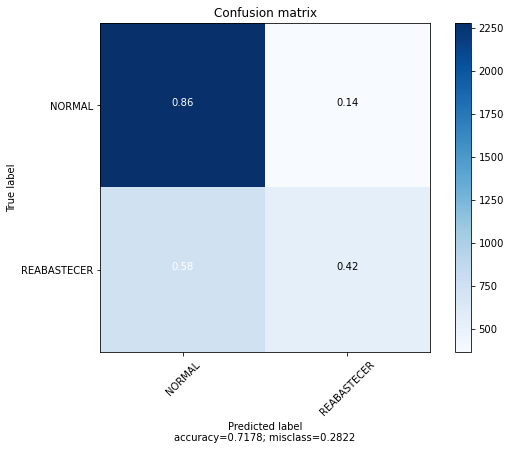

0.49360146252285186

In [258]:
model = SVC(random_state = 133)

pipeline = Pipeline([('scaler', StandardScaler()),  ('estimador', model)]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

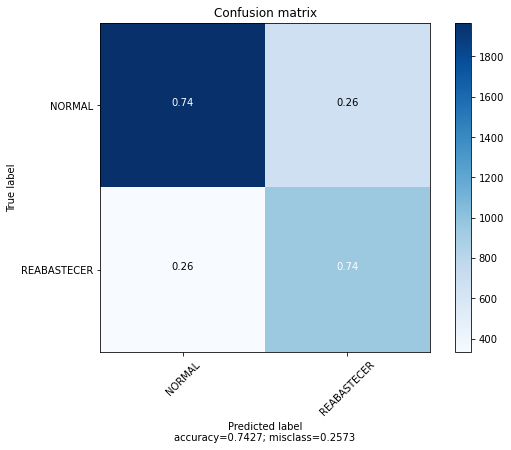

0.6526822558459422

In [259]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(32,4), random_state=337, max_iter=500).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

### Com colunas de diferença

In [263]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif', 'Pêssego_dif'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133, stratify = target, shuffle = True)


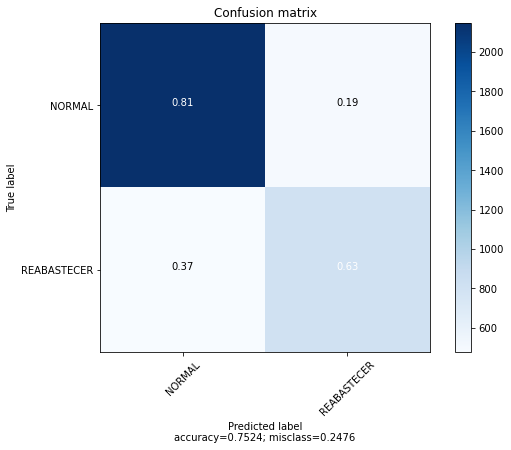

0.6238390092879257

In [266]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=133).fit(X_train, y_train)

y_pred = dtc.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

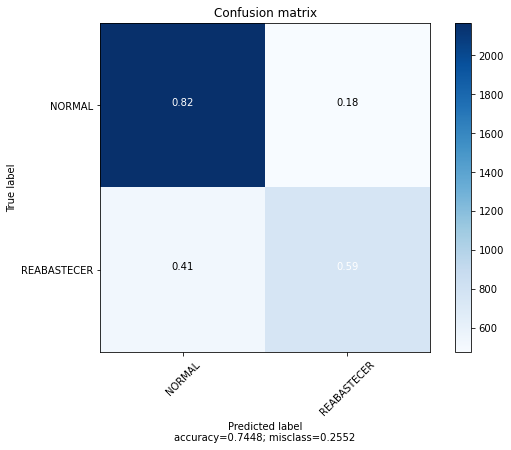

0.6017488076311606

In [267]:
xgbClassifier = xgb.XGBClassifier(random_state = 133, max_depth=4).fit(X_train, y_train)


y_pred = xgbClassifier.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

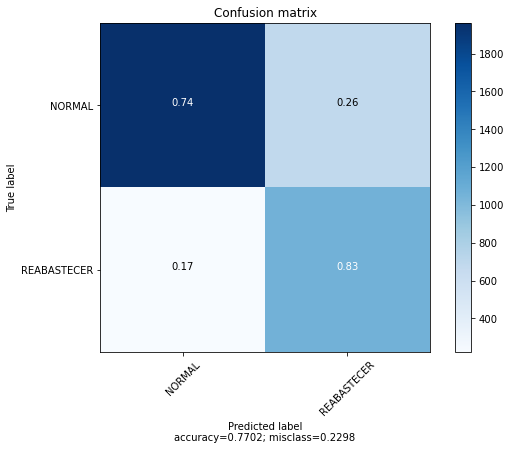

0.7017195767195766

In [268]:
model = RandomForestClassifier(random_state = 133, max_depth=14).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

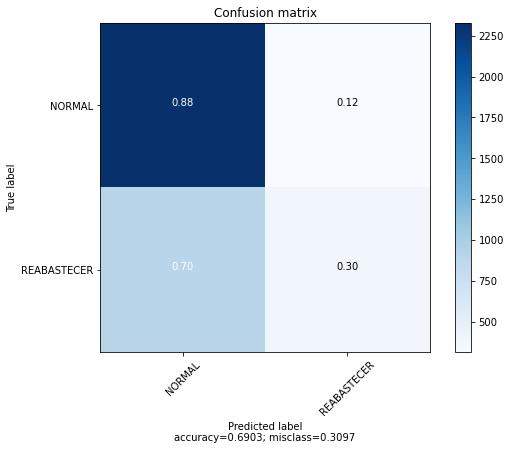

0.3846153846153846

In [269]:
model = SVC(random_state = 133)

pipeline = Pipeline([('scaler', StandardScaler()),  ('estimador', model)]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

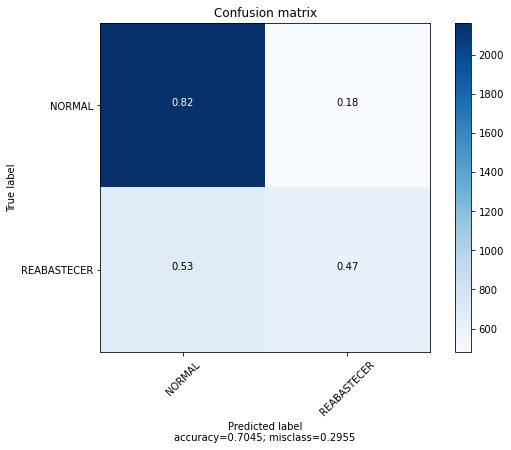

0.5097210481825866

In [270]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(128,4), random_state=337, max_iter=500)

pipeline = Pipeline([('scaler', StandardScaler()),  ('estimador', model)]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

### Usando min e media harmonica

In [271]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'MIN', 'MEDIAH'
    ]
]
SEED = 133

target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)


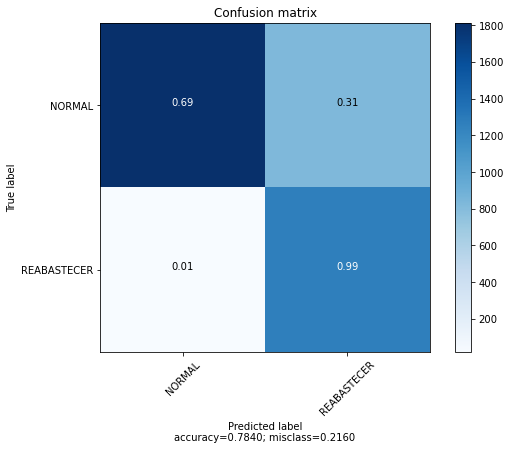

0.7488151658767773

In [272]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train, y_train)

y_pred = dtc.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

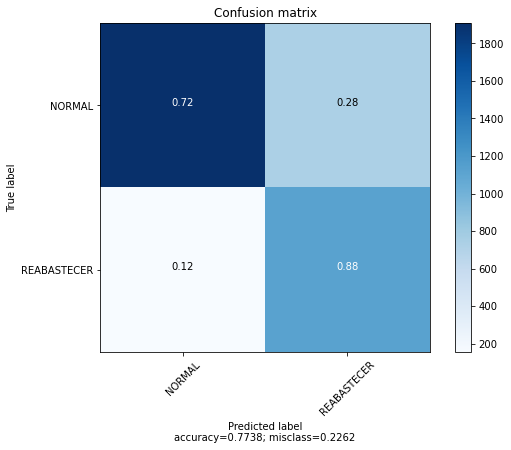

0.7175572519083969

In [273]:
model = RandomForestClassifier(random_state = SEED, max_depth = 14).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

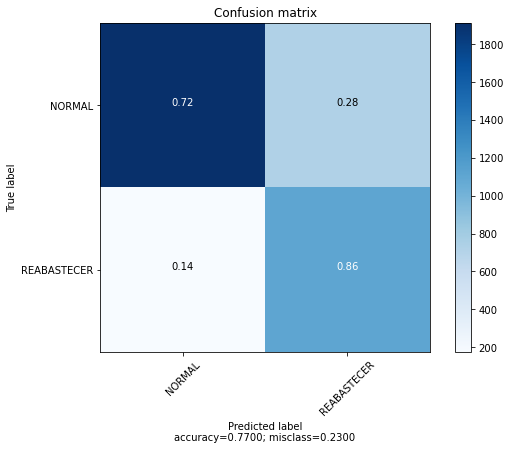

0.7106696571611663

In [274]:
xgbClassifier = xgb.XGBClassifier(random_state = SEED, max_depth = 4).fit(X_train, y_train)


y_pred = xgbClassifier.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

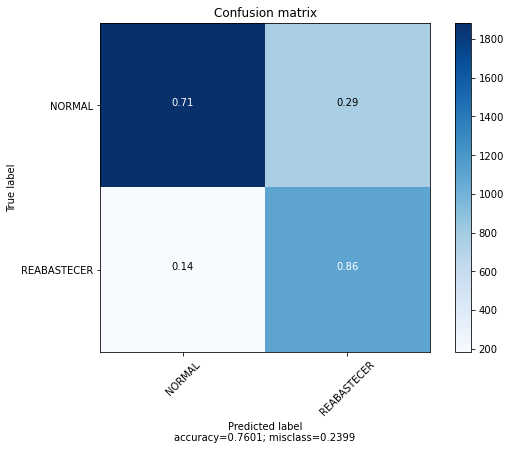

0.7001909611712286

In [275]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(8,2), random_state=SEED, max_iter=500)

pipeline = Pipeline([('scaler', StandardScaler()),  ('estimador', model)]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

### com dummys de estação

In [658]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'MIN', #'MEDIAH',
        'Estação_Ana Rosa', 'Estação_Barra Funda',
       'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
       'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
       'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
       'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
       'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
       'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
       'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
       'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]
SEED=3457
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)

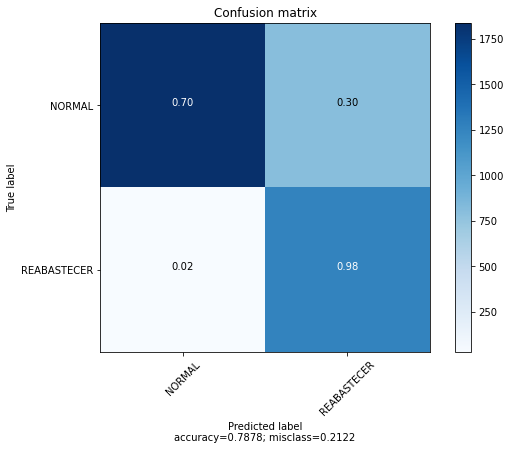

0.7508226144181872

In [659]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train, y_train)

y_pred = dtc.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

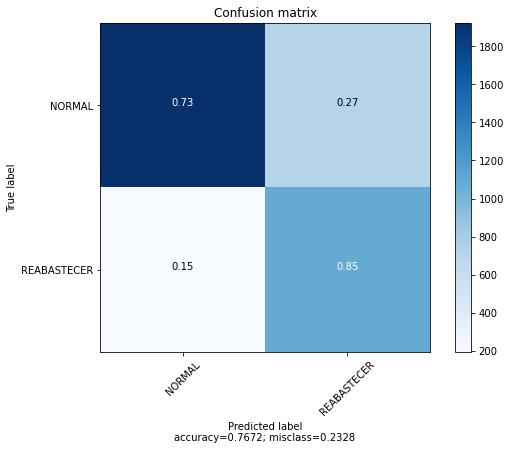

0.704398447606727

In [499]:
model = RandomForestClassifier(random_state = SEED, max_depth = 14).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

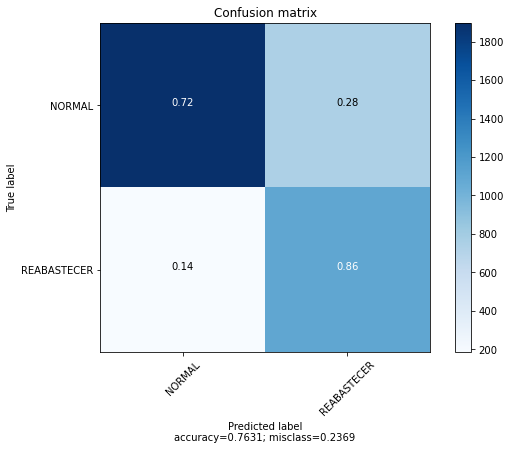

0.7024952015355086

In [500]:
model = xgb.XGBClassifier(random_state = SEED, max_depth = 4).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

D:\Programs\anaconda3\envs\pandas-python3_6\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


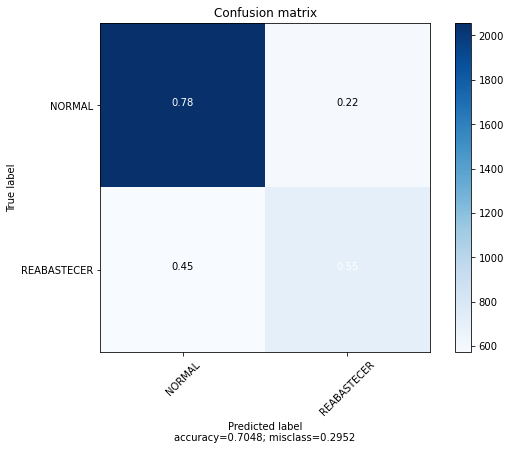

0.550601008142691

In [283]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(32,16), random_state=SEED, max_iter=500)

pipeline = Pipeline([('scaler', StandardScaler()), ('estimador', model)]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

### Colunas de previsões

In [38]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev', 'Original_269_prev', 'Original_473_prev', 'Pêssego_prev', 'Tangerina_prev', 'Zero_prev',
        'MIN', 'MIN_prev', #'MEDIAH',
        #'Estação_Ana Rosa', 'Estação_Barra Funda',
        #'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
        #'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
        #'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
        #'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
        #'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
        #'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
        #'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
        #'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]
SEED=3457
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)

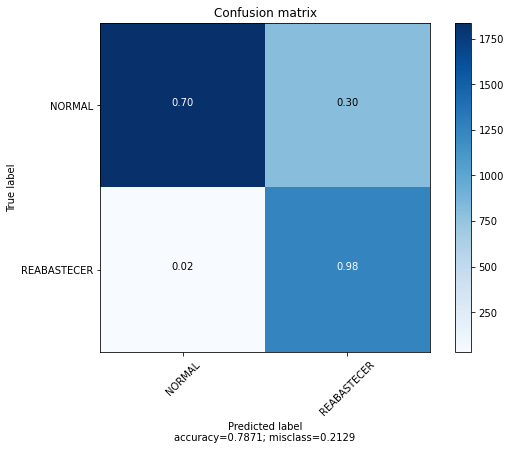

0.7497005988023953

In [37]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train, y_train)

y_pred = dtc.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

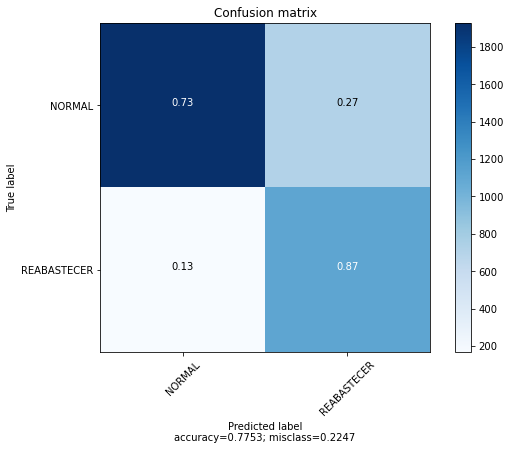

0.7165809768637533

In [39]:
model = RandomForestClassifier(random_state = SEED, max_depth = 14).fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

### Teste com TensorFlow

In [45]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers

In [327]:
df_training_tf = df_training.drop(columns=['Estação_orig', 'Movimentação'], inplace=False)

In [328]:
df_training_tf['TARGET'] = df_training_tf['TARGET'].astype('category')

df_training_tf['COD_TARGET'] = df_training_tf['TARGET'].cat.codes

categorias = dict( enumerate(df_training_tf['TARGET'].cat.categories ) )

print(categorias)
df_training_tf = df_training_tf.drop(columns = ['TARGET'])
df_training_tf.head()

{0: 'NORMAL', 1: 'REABASTECER'}


,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,Tangerina,Zero,Açaí-Guaraná_dif,Citrus_dif,...,Estação_Pinheiros,Estação_República,Estação_São Joaquim,Estação_São Judas,Estação_Sé,Estação_Tamanduateí,Estação_Tatuapé,Estação_Trianon-Masp,Estação_Vila Mariana,COD_TARGET
0,43,43,43,65,86,43,43,65,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,37,43,41,60,75,37,37,55,-6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,31,40,38,54,68,31,31,45,-6.0,-3.0,...,0,0,0,0,0,0,0,0,0,0
3,25,35,37,45,57,29,25,37,-6.0,-5.0,...,0,0,0,0,0,0,0,0,0,0
4,20,32,36,42,45,24,23,30,-5.0,-3.0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
df_training_tf.columns

Index(['Acai-Guarana', 'Citrus', 'Maca-Verde', 'Original_269', 'Original_473',
       'Pessego', 'Tangerina', 'Zero', 'Acai-Guarana_dif', 'Citrus_dif',
       'Maca-Verde_dif', 'Original_269_dif', 'Original_473_dif', 'Pessego_dif',
       'Tangerina_dif', 'Zero_dif', 'MIN', 'MEDIA', 'MEDIAG', 'MEDIAH',
       'Estacao_Ana-Rosa', 'Estacao_Barra-Funda', 'Estacao_Brigadeiro',
       'Estacao_Brooklin', 'Estacao_Bras', 'Estacao_Butanta',
       'Estacao_Campo-Belo', 'Estacao_Consolacao', 'Estacao_Eucaliptos',
       'Estacao_Faria-Lima', 'Estacao_Fradique-Coutinho',
       'Estacao_Higienopolis-Mackenzie', 'Estacao_Hospital-Sao-Paulo',
       'Estacao_Luz', 'Estacao_Moema', 'Estacao_Paraiso', 'Estacao_Pinheiros',
       'Estacao_Republica', 'Estacao_Sao-Joaquim', 'Estacao_Sao-Judas',
       'Estacao_Se', 'Estacao_Tamanduatei', 'Estacao_Tatuape',
       'Estacao_Trianon-Masp', 'Estacao_Vila-Mariana', 'COD_TARGET'],
      dtype='object')

In [330]:
df_training_tf.rename(columns = {'Açaí-Guaraná': 'Acai-Guarana', 'Maçã-Verde': 'Maca-Verde', 'Pêssego': 'Pessego',
                                'Açaí-Guaraná_dif': 'Acai-Guarana_dif', 'Maçã-Verde_dif': 'Maca-Verde_dif',
                                'Pêssego_dif': 'Pessego_dif', 'Estação_Ana Rosa' : 'Estacao_Ana-Rosa', 
                                 'Estação_Barra Funda': 'Estacao_Barra-Funda','Estação_Brigadeiro': 'Estacao_Brigadeiro', 
                                 'Estação_Brooklin': 'Estacao_Brooklin', 'Estação_Brás': 'Estacao_Bras',
                                 'Estação_Butantã': 'Estacao_Butanta', 'Estação_Campo Belo': 'Estacao_Campo-Belo', 
                                 'Estação_Consolação': 'Estacao_Consolacao', 'Estação_Eucaliptos': 'Estacao_Eucaliptos', 
                                 'Estação_Faria Lima': 'Estacao_Faria-Lima', 'Estação_Fradique Coutinho': 'Estacao_Fradique-Coutinho',
                                 'Estação_Higienópolis-Mackenzie':'Estacao_Higienopolis-Mackenzie', 'Estação_Hospital São Paulo': 'Estacao_Hospital-Sao-Paulo',
                                 'Estação_Luz': 'Estacao_Luz', 'Estação_Moema': 'Estacao_Moema', 'Estação_Paraíso': 'Estacao_Paraiso', 
                                 'Estação_Pinheiros': 'Estacao_Pinheiros', 'Estação_República': 'Estacao_Republica', 
                                 'Estação_São Joaquim': 'Estacao_Sao-Joaquim', 'Estação_São Judas': 'Estacao_Sao-Judas',
                                 'Estação_Sé': 'Estacao_Se', 'Estação_Tamanduateí': 'Estacao_Tamanduatei', 
                                 'Estação_Tatuapé': 'Estacao_Tatuape', 'Estação_Trianon-Masp': 'Estacao_Trianon-Masp', 
                                 'Estação_Vila Mariana': 'Estacao_Vila-Mariana' }, inplace = True)

In [375]:
train, test = train_test_split(df_training_tf, test_size=0.4, shuffle = True)
train, val = train_test_split(train, test_size=0.2)

In [332]:
# criando o data frame no formato que o tensor flow aceita
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df, target, shuffle=True, batch_size=32):
    dataframe = df.copy()
    labels = dataframe.pop(target)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    if batch_size is not None:
        ds = ds.batch(batch_size)
    return ds

In [333]:
batch_size = 32
train_ds = df_to_dataset(train, target = 'COD_TARGET', batch_size=batch_size)
val_ds = df_to_dataset(val, target = 'COD_TARGET', shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, target = 'COD_TARGET', shuffle=False, batch_size=batch_size)

In [334]:
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of Zero:', feature_batch['Zero'])
    print('A batch of targets:', label_batch )

Every feature: ['Acai-Guarana', 'Citrus', 'Maca-Verde', 'Original_269', 'Original_473', 'Pessego', 'Tangerina', 'Zero', 'Acai-Guarana_dif', 'Citrus_dif', 'Maca-Verde_dif', 'Original_269_dif', 'Original_473_dif', 'Pessego_dif', 'Tangerina_dif', 'Zero_dif', 'MIN', 'MEDIA', 'MEDIAG', 'MEDIAH', 'Estacao_Ana-Rosa', 'Estacao_Barra-Funda', 'Estacao_Brigadeiro', 'Estacao_Brooklin', 'Estacao_Bras', 'Estacao_Butanta', 'Estacao_Campo-Belo', 'Estacao_Consolacao', 'Estacao_Eucaliptos', 'Estacao_Faria-Lima', 'Estacao_Fradique-Coutinho', 'Estacao_Higienopolis-Mackenzie', 'Estacao_Hospital-Sao-Paulo', 'Estacao_Luz', 'Estacao_Moema', 'Estacao_Paraiso', 'Estacao_Pinheiros', 'Estacao_Republica', 'Estacao_Sao-Joaquim', 'Estacao_Sao-Judas', 'Estacao_Se', 'Estacao_Tamanduatei', 'Estacao_Tatuape', 'Estacao_Trianon-Masp', 'Estacao_Vila-Mariana']
A batch of Zero: tf.Tensor(
[45  2 60  4 25 14 48 17 38 34 20 18 46 35 59 11 29 50 47 65 40 38 39 51
 21 11 36 35 36 48  6 44], shape=(32,), dtype=int32)
A batch of t

In [336]:
# Definindo as colunas
feature_columns = []

# numeric cols
for header in ['Acai-Guarana', 'Citrus', 'Maca-Verde', 'Original_269', 'Original_473',
       'Pessego', 'Tangerina', 'Zero', 'Acai-Guarana_dif', 'Citrus_dif',
       'Maca-Verde_dif', 'Original_269_dif', 'Original_473_dif', 'Pessego_dif',
       'Tangerina_dif', 'Zero_dif', 'MIN', 'MEDIA', 'MEDIAG', 'MEDIAH',
       'Estacao_Ana-Rosa', 'Estacao_Barra-Funda', 'Estacao_Brigadeiro',
       'Estacao_Brooklin', 'Estacao_Bras', 'Estacao_Butanta',
       'Estacao_Campo-Belo', 'Estacao_Consolacao', 'Estacao_Eucaliptos',
       'Estacao_Faria-Lima', 'Estacao_Fradique-Coutinho',
       'Estacao_Higienopolis-Mackenzie', 'Estacao_Hospital-Sao-Paulo',
       'Estacao_Luz', 'Estacao_Moema', 'Estacao_Paraiso', 'Estacao_Pinheiros',
       'Estacao_Republica', 'Estacao_Sao-Joaquim', 'Estacao_Sao-Judas',
       'Estacao_Se', 'Estacao_Tamanduatei', 'Estacao_Tatuape',
       'Estacao_Trianon-Masp', 'Estacao_Vila-Mariana']:
      feature_columns.append(feature_column.numeric_column(header))

In [385]:
# criando o modelo
# camada de entrada
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# criando o modelo 
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.2),
  #layers.Dense(2, activation = tf.nn.softmax)
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [386]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Train for 179 steps, validate for 45 steps
Epoch 1/10
179/179 [==============================] - 2s 14ms/step - loss: 5.0820 - accuracy: 0.6663 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 2/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0701 - accuracy: 0.6717 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 3/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0638 - accuracy: 0.6717 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 4/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0622 - accuracy: 0.6717 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 5/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0544 - accuracy: 0.6717 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 6/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0779 - accuracy: 0.6717 - val_loss: 5.1824 - val_accuracy: 0.6646
Epoch 7/10
179/179 [==============================] - 1s 4ms/step - loss: 5.0662 - accuracy: 0.6717 - va

In [387]:
perda_teste, acuracia_teste = model.evaluate(test_ds)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

149/149 [==============================] - 0s 2ms/step - loss: 4.9806 - accuracy: 0.6774
Perda do teste:  4.980580806732178
Acuracia do teste:  0.67738545


In [391]:
X_test = test.copy()
y_test = X_test.pop('COD_TARGET')
y_test

2289     0
357      0
2235     0
11024    0
11166    1
        ..
4366     0
10465    0
8261     0
11696    0
4559     1
Name: COD_TARGET, Length: 4758, dtype: int8

In [407]:
y_pred = model.predict(test_ds)

#plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
#f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

y_pred = [i[0] for i in y_pred.tolist()]
y_pred[0:10]

# não entendo o que são esses valores

[-37.155494689941406,
 -35.3250732421875,
 -19.479084014892578,
 -37.060951232910156,
 -30.389753341674805,
 -21.55307388305664,
 -65.82022094726562,
 -39.82467269897461,
 -30.385358810424805,
 -20.154094696044922]

### Teste com Keras

In [51]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        #'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        #'Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev', 'Original_269_prev', 'Original_473_prev', 'Pêssego_prev', 'Tangerina_prev', 'Zero_prev',
        'MIN', 'MIN_prev', #'MEDIAH',
        #'Estação_Ana Rosa', 'Estação_Barra Funda',
        #'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
        #'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
        #'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
        #'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
        #'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
        #'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
        #'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
        #'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]
#target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133, stratify = target, shuffle = True)
SEED = 133
target = df_training.replace({'TARGET': {'NORMAL': 0, 'REABASTECER': 1}})['TARGET']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)

n_features = len(X_train.columns)
print("Quantidade de features: %d" % n_features)
target.head()

Quantidade de features: 10


0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test) 

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(n_features,)))

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=50, batch_size=64, verbose=1)

Epoch 1/50
7969/7969 [==============================] - 2s 203us/step - loss: 0.5797 - accuracy: 0.6691
Epoch 2/50
7969/7969 [==============================] - 1s 99us/step - loss: 0.4811 - accuracy: 0.7220
Epoch 3/50
7969/7969 [==============================] - 1s 101us/step - loss: 0.4571 - accuracy: 0.7379
Epoch 4/50
7969/7969 [==============================] - 1s 95us/step - loss: 0.4521 - accuracy: 0.7416
Epoch 5/50
7969/7969 [==============================] - 1s 93us/step - loss: 0.4410 - accuracy: 0.7476
Epoch 6/50
7969/7969 [==============================] - 1s 92us/step - loss: 0.4446 - accuracy: 0.7399
Epoch 7/50
7969/7969 [==============================] - 1s 91us/step - loss: 0.4311 - accuracy: 0.7583
Epoch 8/50
7969/7969 [==============================] - 1s 92us/step - loss: 0.4309 - accuracy: 0.7505
Epoch 9/50
7969/7969 [==============================] - 1s 92us/step - loss: 0.4288 - accuracy: 0.7615 0s - loss: 0.4
Epoch 10/50
7969/7969 [==============================] -

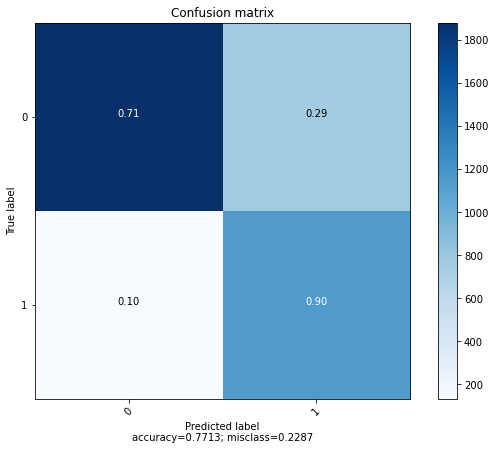

0.7190237797246558

In [55]:
y_pred = model.predict_classes(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), [0, 1])
f1_score(y_test, y_pred, average="binary", pos_label=1)

In [476]:
model.reset_states()

### Fazer o cross validate nos melhores

In [58]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'MIN', 'MEDIAH',
        'Estação_Ana Rosa', 'Estação_Barra Funda',
       'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
       'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
       'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
       'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
       'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
       'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
       'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
       'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]
SEED=3393
np.random.seed(SEED)
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)
cv = StratifiedKFold(n_splits = 8, shuffle = True, random_state=SEED)

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="REABASTECER")

In [610]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=SEED)

results = cross_validate(model, features, target, cv = cv, scoring=f1_scorer)
print_results(results, "f1")

f1 = 74.40
f1 = [71.82, 76.98]


In [603]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=SEED), tree_para, cv=cv, scoring=f1_scorer)
clf.fit(features, target)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=3393, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=3393),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             scoring=make_scorer(f1_score, pos_label=REABASTECER))

In [607]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [615]:
model = RandomForestClassifier(criterion='gini', max_depth = 16, max_features = 'auto',n_estimators=500, random_state = SEED)

results = cross_validate(model, features, target, cv = cv, scoring=f1_scorer)
print_results(results, "f1")

f1 = 72.26
f1 = [69.67, 74.85]


In [612]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(RandomForestClassifier(random_state=SEED), param_grid, cv=cv, scoring=f1_scorer)
clf.fit(features, target)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=3393, shuffle=True),
             estimator=RandomForestClassifier(random_state=3393),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring=make_scorer(f1_score, pos_label=REABASTECER))

In [613]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 500}

In [68]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        #'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev', 'Original_269_prev', 'Original_473_prev', 'Pêssego_prev', 'Tangerina_prev', 'Zero_prev',
        'MIN', #'MIN_prev', #'MEDIAH',
        'Estação_Ana Rosa', 'Estação_Barra Funda',
        'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
        'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
        'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
        'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
        'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
        'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
        'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
        'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]

SEED=3393
np.random.seed(SEED)
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=SEED, stratify = target, shuffle = True)
cv = StratifiedKFold(n_splits = 8, shuffle = True, random_state=SEED)

In [69]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=SEED)

results = cross_validate(model, features, target, cv = cv, scoring=f1_scorer)
print_results(results, "f1")

f1 = 74.96
f1 = [72.66, 77.27]


In [67]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=SEED), tree_para, cv=cv, scoring=f1_scorer)
clf.fit(features, target)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=3393, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=3393),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(f1_score, pos_label=REABASTECER))

In [692]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

In [ ]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
